In [87]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import math
import datetime

from sklearn import metrics
from math import sqrt

In [2]:
df = pd.read_excel("C:/Users/hayrettin.sipar/Desktop/Projeler/Pladis/Bisküvi Talep Tahminleme/Input Data/Sales Forecast Data v2.xlsx",
                   sheet_name='SATIS_VERISI_NEW',header=0)

In [ ]:
df.head()

In [ ]:
len(df)

In [ ]:
df.count()

In [ ]:
type(df.MONTH[0])

In [3]:
df['Total_TR_daily_vol'] = df['Total_TR_vol'] / df['No_of_days']

In [4]:
df.MONTH = df.MONTH.apply(lambda x: datetime.datetime.strptime(x, '%b%Y'))
df.index = df.MONTH
df.rename(columns={'MONTH':'DATE'},inplace=True)

In [76]:
is_biskrem = df['URUN'] == 'ULKER BISKREM'
is_saklikoy = df['SUBBRAND'] == 'SAKLIKOY KREMALI'
is_potibor = df['URUN'] == 'ULKER POTIBOR'
is_ulker = df['COMPANY'] == 'ULKER'
is_ikram = df['URUN'] == 'ULKER IKRAM'
is_bebe = df['URUN'] == 'ULKER ULKER BEBE'
is_cizi = df['URUN'] == 'ULKER CIZI'
is_cubuk = df['URUN'] == 'ULKER CUBUK'
is_kremalı = df['URUN'] == 'ULKER KREMALI'
is_cokoprens = df['URUN'] == 'ULKER COKOPRENS'
is_hanımeller = df['URUN'] == 'ULKER HANIMELLER'
is_probis = df['URUN'] == 'ULKER PROBIS'
is_rondo = df['URUN'] == 'ULKER RONDO RONDO KLASIK'


df_biskrem = df[is_biskrem].copy()
df_ulker = df[is_ulker].copy()
df_saklikoy = df[is_saklikoy].copy()
df_potibor = df[is_potibor].copy()
df_ikram = df[is_ikram].copy()
df_bebe = df[is_bebe].copy()
df_cizi = df[is_cizi].copy()
df_cubuk = df[is_cubuk].copy()
df_kremalı = df[is_kremalı].copy()
df_cokoprens = df[is_cokoprens].copy()
df_hanımeller = df[is_hanımeller].copy()
df_probis = df[is_probis].copy()
df_rondo = df[is_rondo].copy()

In [60]:
df_ulker[df_ulker['DATE']=='2020-06-01'].sort_values('Total_TR_daily_vol',ascending=False).head(60)

,URUN,COMPANY,BRAND,SUBBRAND,DATE,Total_TR_vol,Total_TR_val,Total_TR_ppv_kg,Total_tr_wghtd_dist,Total_tr_nmrc_dist,...,Actual_Holiday_Ratio,Total_Holiday_n,Total_Holiday_Ratio,School_Day_n,School_Day_Ratio,School_Day_brdg_n,School_Day_brdg_Ratio,Ramadan_n,Ramadan_Ratio,Total_TR_daily_vol
MONTH,,,,,,,,,,,,,,,,,,,,,
2020-06-01,ULKER POTIBOR,ULKER,POTIBOR,POTIBOR,2020-06-01,1210.1,15200.6,12.56,75,71,...,0.350000,11.0,0.366667,6.0,0.200000,6.0,0.200000,14,0.466667,40.336667
2020-06-01,ULKER ULKER BEBE,ULKER,ULKER BEBE,ULKER BEBE,2020-06-01,652.5,8940.4,13.70,76,46,...,0.258065,8.0,0.258065,23.0,0.741935,23.0,0.741935,0,0.000000,21.048387
2020-06-01,ULKER CIZI,ULKER,CIZI,CIZI,2020-06-01,531.9,8889.8,16.71,99,95,...,0.266667,8.0,0.266667,0.0,0.000000,0.0,0.000000,0,0.000000,17.730000
2020-06-01,ULKER BISKREM,ULKER,BISKREM,BISKREM,2020-06-01,523.0,10007.5,19.14,83,89,...,0.258065,8.0,0.258065,23.0,0.741935,23.0,0.741935,0,0.000000,16.870968
2020-06-01,ULKER SAKLIKOY SAKLIKOY KREMALI,ULKER,SAKLIKOY,SAKLIKOY KREMALI,2020-06-01,504.0,9210.3,18.27,93,79,...,0.290323,9.0,0.290323,22.0,0.709677,22.0,0.709677,0,0.000000,16.258065
2020-06-01,ULKER CUBUK,ULKER,CUBUK,CUBUK,2020-06-01,477.4,7928.9,16.61,94,84,...,0.322581,11.0,0.354839,21.0,0.677419,20.0,0.645161,0,0.000000,15.400000
2020-06-01,ULKER KREMALI,ULKER,KREMALI,KREMALI,2020-06-01,459.6,6543.0,14.24,75,71,...,0.258065,8.0,0.258065,23.0,0.741935,23.0,0.741935,0,0.000000,14.825806
2020-06-01,ULKER IKRAM,ULKER,IKRAM,IKRAM,2020-06-01,442.1,9272.6,20.97,98,92,...,0.266667,8.0,0.266667,14.0,0.466667,14.0,0.466667,0,0.000000,14.736667
2020-06-01,ULKER COKOPRENS,ULKER,COKOPRENS,COKOPRENS,2020-06-01,433.1,7748.7,17.89,88,70,...,0.266667,8.0,0.266667,13.0,0.433333,13.0,0.433333,0,0.000000,14.436667


In [61]:
df_ulker_agg = pd.DataFrame(df_ulker.groupby('DATE')['Total_TR_daily_vol'].sum())

<Figure size 7200x7200 with 0 Axes>

<Figure size 7200x7200 with 0 Axes>

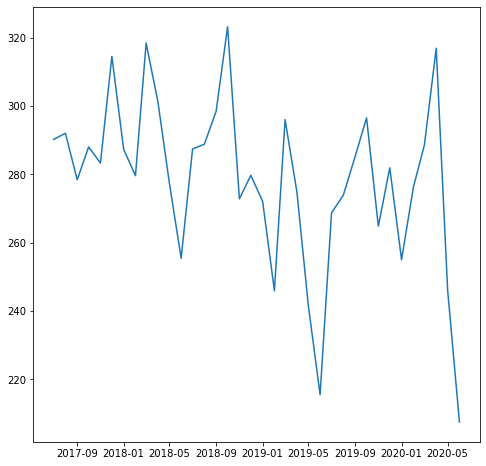

In [97]:
plt.figure(figsize=(8,8))
plt.plot(df_rondo['Total_TR_vol'])

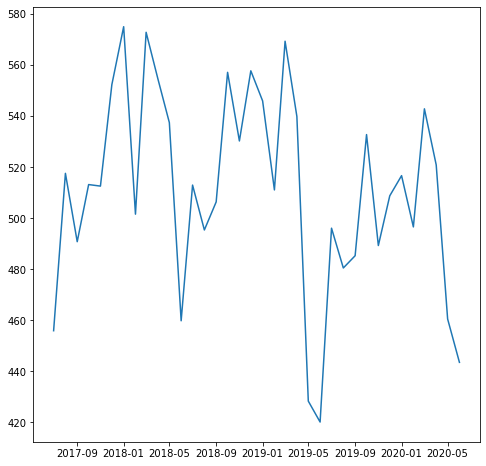

In [99]:
plt.figure(figsize=(8,8))
plt.plot(df_hanımeller['Total_TR_vol'])

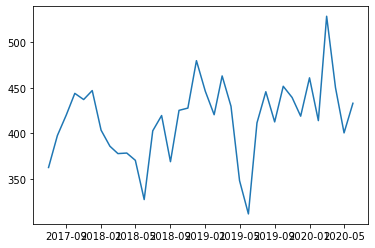

In [75]:
plt.plot(df_cokoprens['Total_TR_vol'])

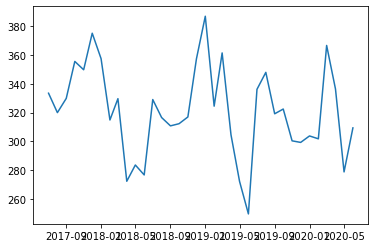

In [85]:
plt.plot(df_probis['Total_TR_vol'])

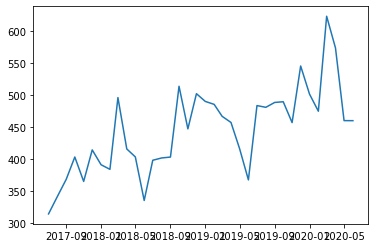

In [62]:
plt.plot(df_kremalı['Total_TR_vol'])

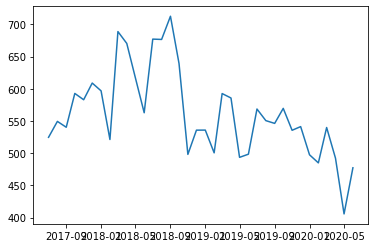

In [63]:
plt.plot(df_cubuk['Total_TR_vol'])

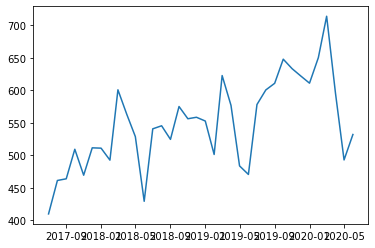

In [64]:
plt.plot(df_cizi['Total_TR_vol'])

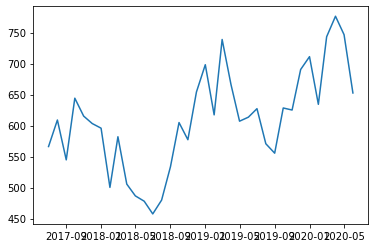

In [65]:
plt.plot(df_bebe['Total_TR_vol'])

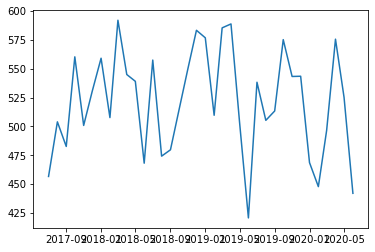

In [66]:
plt.plot(df_ikram['Total_TR_vol'])

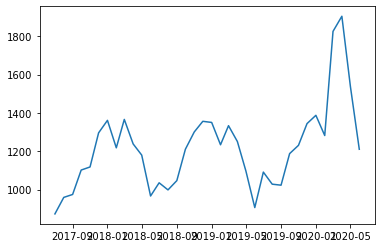

In [67]:
plt.plot(df_potibor['Total_TR_vol'])

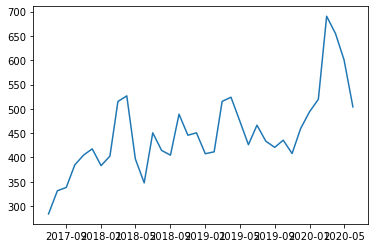

In [68]:
plt.plot(df_saklikoy['Total_TR_vol'])

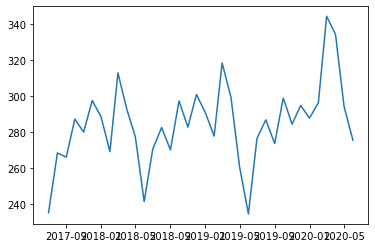

In [69]:
plt.plot(df_ulker_agg['Total_TR_daily_vol'])

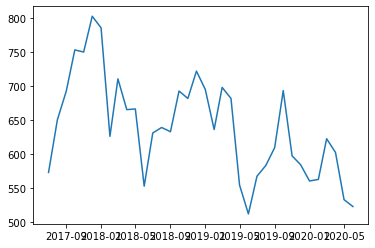

In [84]:
plt.plot(df_biskrem['Total_TR_vol'])

In [86]:
print('Mean :',np.mean(df_biskrem['Total_TR_vol']))
print('Std : ',np.std(df_biskrem['Total_TR_vol']))
print('Max : ',max(df_biskrem['Total_TR_vol']))
print('Min : ',min(df_biskrem['Total_TR_vol']))

Mean : 640.0277777777777
Std :  73.17980372233521
Max :  802.2
Min :  512.2


In [ ]:
df_biskrem['Total_TR_vol_daily_avg'] = df_biskrem['Total_TR_vol'] / df_biskrem['No_of_days']
df_biskrem['Total_TR_vol_T-1'] = df_biskrem['Total_TR_vol'].shift(1)
df_biskrem['Total_TR_vol_daily_avg_T-1'] = df_biskrem['Total_TR_vol_daily_avg'].shift(1)
df_biskrem['Total_TR_vol_davg_T-1_pred'] = round(df_biskrem['Total_TR_vol_daily_avg_T-1'] * df_biskrem['No_of_days'],1)
df_biskrem_naive1 = df_biskrem[['Total_TR_vol','Total_TR_vol_T-1','Total_TR_vol_davg_T-1_pred']].copy()
df_biskrem_naive1.dropna(inplace=True)

In [ ]:
df_biskrem_naive1

In [ ]:
true = df_biskrem_naive1['Total_TR_vol']
pred1 = df_biskrem_naive1['Total_TR_vol_T-1']
pred2 = df_biskrem_naive1['Total_TR_vol_davg_T-1_pred']
error_naive1 = sqrt(metrics.mean_squared_error(true,pred1))
error_naive2 = sqrt(metrics.mean_squared_error(true,pred2))
mae_naive1 = metrics.mean_absolute_error(true,pred1)
mae_naive2 = metrics.mean_absolute_error(true,pred2)
print ('RMSE for Naive Method 1: ', error_naive1)
print ('MAE for Naive Method 1: ', mae_naive1)
print ('RMSE for Naive Method 2: ', error_naive2)
print ('MAE for Naive Method 2: ', mae_naive2)

In [ ]:
plt.plot(true)
#plt.plot(pred1)
plt.plot(pred2)
plt.show()

In [ ]:
df_biskrem['Total_TR_vol_123'] = df_biskrem['Total_TR_vol'].rolling(3).mean().shift(1)
df_biskrem_naive2 = round(df_biskrem[['Total_TR_vol','Total_TR_vol_123']].dropna(),ndigits=1)

In [ ]:
true = df_biskrem_naive2['Total_TR_vol']
pred2 = df_biskrem_naive2['Total_TR_vol_123']
error_naive2 = sqrt(metrics.mean_squared_error(true,pred2))
mae_naive2 = metrics.mean_absolute_error(true,pred2)
print ('RMSE for Naive Method 2: ', error_naive2)
print ('MAE for Naive Method 1: ', mae_naive2)

In [ ]:
plt.plot(true)
plt.plot(pred2)
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

train = df_biskrem['Total_TR_vol']

plot_acf(train, lags = 33)
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

train = df['Total_TR_vol']

plot_pacf(train, lags = 33)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

train = df_biskrem['Total_TR_vol']

result = adfuller(train)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

In [ ]:
result

In [ ]:
split = len(df_biskrem) - int(0.2*len(df_biskrem))
train, test = df_biskrem['Total_TR_vol'][0:split], df_biskrem['Total_TR_vol'][split:]

In [ ]:
train

In [ ]:
test

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(train.values, order=(5, 0, 2))
model_fit = model.fit(disp=False)

In [ ]:
predictions = model_fit.predict(len(test))

In [ ]:
len(predictions)

In [ ]:
test_ = pd.DataFrame(test)
test_['predictions'] = predictions[0:7]

In [ ]:
plt.plot(df_biskrem['Total_TR_vol'])
plt.plot(test_.predictions)
plt.show()

In [ ]:
error = sqrt(metrics.mean_squared_error(test.values,predictions[0:7]))
mae = metrics.mean_absolute_error(test.values,predictions[0:7])
print ('Test RMSE for ARIMA: ', error)
print ('Test MAE for ARIMA: ', mae)

In [79]:
from scipy.stats.stats import pearsonr
x = df_biskrem['Total_TR_vol'].values
y = df_biskrem['School_Day_Ratio'].values

In [ ]:
corr , p = pearsonr(x,y)
print ('Corelation Coefficient =', corr,'\nP-Value =',p)

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(x, exog = y, order = (2, 0, 2), seasonal_order = (2, 0, 1, 12), enforce_stationarity=False, enforce_invertibility = False)
model_fit = model.fit(disp = False)

In [ ]:
y_ = test['Total_TR_vol'].values
predicted = model_fit.predict(exog=y_)
test_= pandas.DataFrame(test)
test_['predictions'] = predicted[0:7]